### Problem Statement

### Import Libraries

In [3]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import warnings
warnings.filterwarnings('ignore')

### Data Gathering

In [4]:
df=pd.read_csv('medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot: >

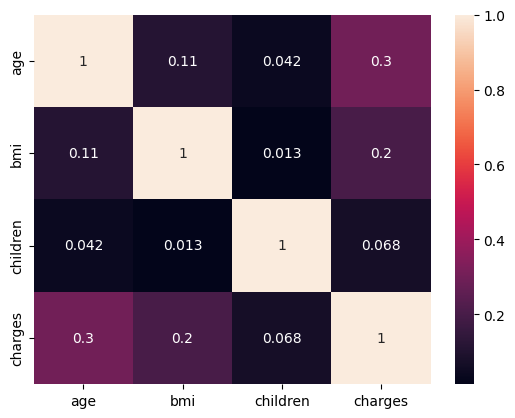

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot: xlabel='children', ylabel='Density'>

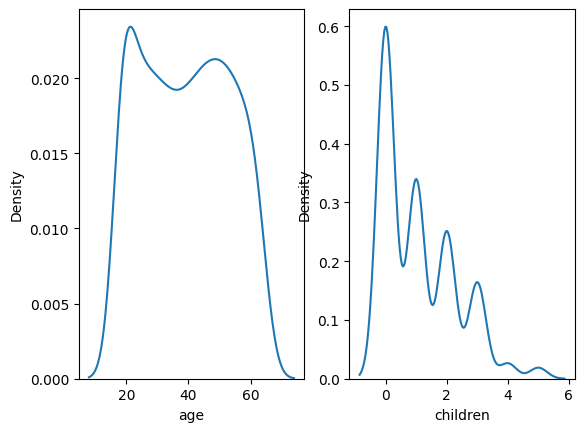

In [20]:
plt.subplot(1,2,1)
sns.kdeplot(df['age'])
plt.subplot(1,2,2)
sns.kdeplot(df['children'])

In [22]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
# label encoding

In [23]:
df['sex']=df['sex'].replace({'female':0,'male':1})

In [24]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [26]:
df['smoker']=df['smoker'].replace({'no':0,'yes':1})

In [27]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [29]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
oe=OrdinalEncoder()
df[['region']]=oe.fit_transform(df[['region']])

In [33]:
df['region'].value_counts()

2.0    364
3.0    325
1.0    325
0.0    324
Name: region, dtype: int64

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3.0,16884.92400
1,18,1,33.770,1,0,2.0,1725.55230
2,28,1,33.000,3,0,2.0,4449.46200
3,33,1,22.705,0,0,1.0,21984.47061
4,32,1,28.880,0,0,1.0,3866.85520


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 73.3 KB


### Model Training

In [36]:
x=df.drop('charges',axis=1)
y=df['charges']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [39]:
rt_model=RandomForestRegressor()
rt_model.fit(x_train,y_train)

RandomForestRegressor()

### Model Evaluation with Test data

In [40]:
y_pred=rt_model.predict(x_test)

In [41]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)

print(f"MAE:{mae}")
print(f"MSE:{mse}")
print(f"R2_Score:{R2_score}")

MAE:2693.8965424071694
MSE:21831765.20412996
R2_Score:0.8408468387940216


### Model Evaluation with Train data

In [42]:
y_pred_train=rt_model.predict(x_train)

In [43]:
mae=mean_absolute_error(y_train,y_pred_train)
mse=mean_squared_error(y_train,y_pred_train)
R2_score=r2_score(y_train,y_pred_train)

print(f"MAE:{mae}")
print(f"MSE:{mse}")
print(f"R2_Score:{R2_score}")

MAE:1067.443607305776
MSE:3605501.699218223
R2_Score:0.9759090103129103


### Hyperparameter Tuning

In [47]:
import time

In [48]:
start_time=time.time()
rt_model=RandomForestRegressor()

param_grid={"criterion":["squared_error", "absolute_error"],
           "n_estimators":np.arange(50,200),
           "max_depth":np.arange(3,10),
           "min_samples_split":np.arange(10,15),
           "min_samples_leaf":np.arange(3,10)}

rscv_rt_model=RandomizedSearchCV(rt_model,param_grid,cv=5)
rscv_rt_model.fit(x_train,y_train)
rscv_rt_model.best_estimator_

RandomForestRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=10,
                      n_estimators=88)

In [49]:
end_time=time.time()

In [50]:
total_time=end_time-start_time
print('Time taken to run the model is:',total_time)

Time taken to run the model is: 38.61878681182861


In [51]:
new_rt_model=rscv_rt_model.best_estimator_

### Model Evaluation with test data

In [52]:
y_pred=new_rt_model.predict(x_test)

In [53]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)

print(f"MAE:{mae}")
print(f"MSE:{mse}")
print(f"R2_Score:{R2_score}")

MAE:2490.8087762585387
MSE:19801791.97503017
R2_Score:0.8556453057779749


### Model Evaluation with train data

In [54]:
y_pred_train=new_rt_model.predict(x_train)

In [55]:
mae=mean_absolute_error(y_train,y_pred_train)
mse=mean_squared_error(y_train,y_pred_train)
R2_score=r2_score(y_train,y_pred_train)

print(f"MAE:{mae}")
print(f"MSE:{mse}")
print(f"R2_Score:{R2_score}")

MAE:2463.329686506514
MSE:18587704.505876407
R2_Score:0.8758019729529364


In [57]:
train_accuracy_score=new_rt_model.score(x_train,y_train)
train_accuracy_score

0.8758019729529364

In [58]:
test_accuracy_score=new_rt_model.score(x_test,y_test)
test_accuracy_score

0.8556453057779749

In [59]:
new_rt_model

RandomForestRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=10,
                      n_estimators=88)

### User Inputs

In [ ]:
# age	sex	bmi	children	smoker	region	charges
# 19	female	27.900	0	yes	southwest	16884.92400
# 18	male	33.770	1	no	southeast	1725.55230
# 28	male	33.000	3	no	southeast	4449.46200
# 33	male	22.705	0	no	northwest	21984.47061

In [61]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [74]:
project_data={'sex':{'female':0,'male':1},
             'smoker':{'no':0,'yes':1},
             'region':{'northeast':0,'northwest':1,'southeast':2,'southwest':3},
             'columns':list(x.columns)}

In [75]:
import pickle
import json

In [76]:
# project_data created for columns:
with open('project_data.json','w') as f1:
    json.dump(project_data,f1)

In [77]:
# read project data file:
with open('project_data.json','r') as f2:
    data=json.load(f2)

In [68]:
# write file
with open('medical_insurance_data.pickle','wb') as f3:
    pickle.dump(new_rt_model,f3)

In [72]:
# read file
with open('medical_insurance_data.pickle','rb') as f4:
    rt1_model=pickle.load(f4)

In [73]:
rt1_model

RandomForestRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=10,
                      n_estimators=88)

In [83]:
# 18	male	33.770	1	no	southeast	1725.55230
age=18
sex='male'
bmi=33.770
children=1
smoker='no'
region='southwest'

pred_input=pd.Series(np.zeros(len(data['columns'])),index=data['columns'])
pred_input['age']=age
pred_input['sex']=data['sex'][sex]
pred_input['bmi']=bmi
pred_input['children']=children
pred_input['smoker']=data['smoker'][smoker]
pred_input['region']=data['region'][region]


pred_output=rt1_model.predict([pred_input])[0]
print("Medical Insurance chrges is:",pred_output)

Medical Insurance chrges is: 4345.107379207717


In [86]:
d=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
d

,y_test,y_pred
1274,17043.34140,17868.623309
786,12741.16745,14928.829267
262,24869.83680,24213.400332
1078,34672.14720,36209.641552
148,10959.69470,13385.610204
...,...,...
1088,9748.91060,13720.048129
959,28468.91901,10058.219016
462,15230.32405,15773.097298
1271,3021.80915,4188.714307
